In [1]:
from sqlalchemy import create_engine
from config import key
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import Column, Integer, String, Float

### Connect to Postgres Database

In [2]:
rds_connection_string = f"postgres:{key}@10.0.0.6:5432/employee2"
engine = create_engine(f"postgresql://{rds_connection_string}")
conn = engine.connect()

### Query Database

In [3]:
data=pd.read_sql("SELECT ROUND(AVG(S.SALARY),2), T.TITLE FROM EMPLOYEES AS E, SALARIES AS S, TITLES AS T WHERE E.EMP_NO=S.EMP_NO AND E.EMP_TITLE_ID=T.TITLE_ID GROUP BY T.TITLE", conn)

### Visualize Data for Validation

In [4]:
data.head()

,round,title
0,48564.43,Assistant Engineer
1,48535.34,Engineer
2,51531.04,Manager
3,48506.80,Senior Engineer
4,58550.17,Senior Staff


### Creates Data structure to create bar chart

In [5]:
group=data.groupby(['title']).agg(['max'])

### Creates Bar Chart of Average Salaries by Title

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

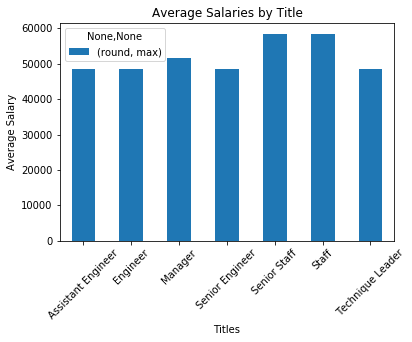

In [8]:
barplot=group.plot(kind='bar',title='Average Salaries by Title')
barplot.set_xlabel('Titles')
barplot.set_ylabel('Average Salary')
plt.show
plt.xticks(rotation=45)

### Creates Histogram of Salaries

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002437CEB9A88>]],
      dtype=object)

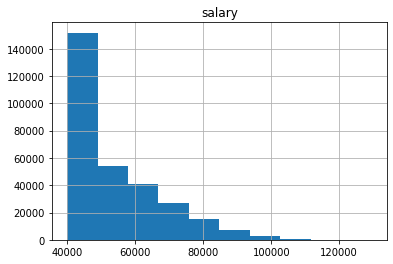

In [11]:
# Source: https://mode.com/example-gallery/python_histogram/

# Query database tables to retrieve salary data
salaries=pd.read_sql("SELECT SALARY FROM SALARIES", conn)

# Creates histogram
salaries.hist(column='salary')